# Teaching A Machine To Add

#### Introduction: 
In this project, I am examining a few machine learning models. With each of these models, I am asking the following questions: 
* How well will this model predict the addition of 2 numbers? 
* What if it were given imperfect data?
* How would more data relate to predictive ability?
    
The purpose of this study is to get a better understanding of how each of these models behave. 

#### Rules For This Experiment: 
1. No feature engineering or excluding outliers. Otherwise, the problem is solved before the machine learning model starts.
2. Default settings only. For the neural network, there is no default setting per se, so I've tried to keep things simple.

#### Summary of Results:
* Linear regression worked very well as was expected.
* There were very interesting patterns created by the predictions of some of the models. This is related to the randomised input data for model training.
* The neural network worked very well, but ended up getting wider layers than I expected. I also found that dropout layers didn't improve performance. Most surprisingly, the neural network trained extremely quickly.
* Completely unsurprisingly, classifiers are not as good at adding.

#### Other Notes:
* Sorry for all of the naked Excepts **¯\\\_(ツ)\_/¯**

# Import Libraries

In [56]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 10  # no scientific notation in graphs
# mpl.rcParams["axes.formatter.useoffset"] = False
import seaborn as sns
sns.set_theme()

# Classes to Generate Training and Test Data

In [2]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            
            # set y to be the addition of x1 and x2
            y = x1 + x2
            
            # set y to a random value if math_accuracy is exceeded
            if i / list_size >= math_accuracy:
                while y == x1 + x2:
                    # rand num * 2 so that plot and rand share the same domain
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            
            self.append([x1, x2, y])

        # sort finished list so errors are not clustered
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    to be used for testing
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])
        

In [3]:
# Initialise Training Sets
# small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)


# Check Math Function

In [4]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, # times y ~ x1 + x2, and mean square error
    ie, (rows, correct_when_rounded, correct, MSE)
    '''

    rows = 0
    correct_when_rounded = 0
    correct = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow        
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE


# Import and Initialise ML Models

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# # naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest
rf_model = RandomForestClassifier()

# xgboost
xgb_model = XGBRegressor()

# tensor flow (not "default", but only moderate tuning)
tf_width = 256  # lower values perform poorly
tf_dropout = 0  # seems to perform negatively in most cases
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# Lists of Models and Training Sets

In [14]:
# set up lists of models / sets

list_of_models = [dt_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]


# Functions: Train, Predict

In [15]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    try:
        # verbose=0 for tensorflow
        model.fit(np.array(ind_var), np.array(dep_var), verbose=0)
    except:
        model.fit(np.array(ind_var), np.array(dep_var))
        
    return model


def predict_model(model, test_set):
    # uses np.array() for XGBoost
    try:
        # verbose=0 for tensorflow
        return model.predict(np.array(test_set), verbose=0)
    except:
        return model.predict(np.array(test_set))


def get_name_of_model(model):
    model_text = str(model).split("(")[0]
    if model_text[0] == "<":
        model_text = "Keras.TensorFlow"

    return model_text


# Train all models on all training sets and output prediction summary from check_math()

In [16]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    Takes in the ML model, a list of training sets, and the number of
    tests to perform. Checks math using check_math() from above.
    Uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # These are likely the same as the min and max above
    # but they don't need to be. Maybe try testing extreme values.
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [17]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(dt_results))

DecisionTreeClassifier
       0    1    2     3
0   1000   21   21   681
1   1000   13   13   978
2   1000   25   25  2627
3   1000   11   11  5856
4   1000   12   12  8001
5   1000   67   67    53
6   1000   68   68   111
7   1000   60   60  1962
8   1000   45   45  5406
9   1000   40   40 10654
10  1000  257  257     3
11  1000  268  268   164
12  1000  243  243  1986
13  1000  184  184  4674
14  1000  129  129 10313
Wall time: 975 ms


In [18]:
%%time
n_model = 1
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(nb_results))

GaussianNB
       0   1   2     3
0   1000  11  11  1571
1   1000  15  15   986
2   1000   5   5 11317
3   1000  10  10  4626
4   1000   8   8  6210
5   1000  25  25   242
6   1000  30  30   239
7   1000  26  26   372
8   1000  11  11  2432
9   1000  10  10  3976
10  1000  26  26   464
11  1000  22  22   413
12  1000  21  21   538
13  1000  19  19   682
14  1000  14  14   738
Wall time: 801 ms


In [19]:
%%time
n_model = 2
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(lr_results))

LinearRegression
       0     1    2    3
0   1000  1000  404    0
1   1000   619    0    0
2   1000    47    0   81
3   1000    17    0  830
4   1000     4    0 1404
5   1000  1000  307    0
6   1000   385    0    0
7   1000    44    0   65
8   1000    14    0  485
9   1000    11    0 2092
10  1000  1000  188    0
11  1000   418    0    1
12  1000    55    0   76
13  1000    18    0  380
14  1000     8    0 1509
Wall time: 757 ms


In [20]:
%%time
n_model = 3
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(rf_results))

RandomForestClassifier
       0    1    2     3
0   1000   25   25   310
1   1000   27   27   317
2   1000   31   31  2924
3   1000   14   14  7343
4   1000   22   22  5809
5   1000   81   81    35
6   1000   83   83   185
7   1000   62   62  1633
8   1000   61   61  4648
9   1000   33   33 11110
10  1000  233  233     3
11  1000  225  225   147
12  1000  195  195  2213
13  1000  162  162  4191
14  1000  121  121  8354
Wall time: 58.5 s


In [21]:
%%time
n_model = 4
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(xgb_results))

XGBRegressor
       0    1  2    3
0   1000   39  0  162
1   1000   43  0  133
2   1000   25  0 1679
3   1000   18  0 4450
4   1000   12  0 3738
5   1000  124  0   12
6   1000  119  0   76
7   1000   59  0 1321
8   1000   17  0 3013
9   1000    9  0 5715
10  1000  310  0    2
11  1000  202  0  117
12  1000   58  0  425
13  1000   23  0  859
14  1000   12  0 2917
Wall time: 6.27 s


In [28]:
%%time
n_model = 5
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tf_results))

Keras.TensorFlow
       0    1  2    3
0   1000   43  0  305
1   1000   60  0   41
2   1000   45  0  106
3   1000    4  0  547
4   1000    9  0 1153
5   1000  451  0    1
6   1000  381  0   42
7   1000   21  0  446
8   1000   24  0  202
9   1000    9  0 1696
10  1000  873  0    0
11  1000  460  0    0
12  1000  165  0    9
13  1000   27  0  382
14  1000    4  0 1196
Wall time: 7.76 s


# Summary of Model Performance

In [29]:
list_of_results = [dt_results, nb_results, lr_results, rf_results, xgb_results, tf_results]

list_of_model_names = ['Decision Tree', 'Naive Bayes', 'Linear Regression', 
                       'Random Forest', 'XGBoost', 'Keras TensorFlow']

list_of_settings = [[100, 100], [100, 99], [100, 90], [100, 75], [100, 50], 
                    [1000, 100], [1000, 99], [1000, 90], [1000, 75], [1000, 50], 
                    [10000, 100], [10000, 99], [10000, 90], [10000, 75], [10000, 50]]

df_settings = pd.DataFrame(list_of_settings)
MSE_summary = pd.DataFrame()

for i, x in enumerate(list_of_results):
    name = list_of_model_names[i]
    x = pd.DataFrame(x)
        
    # generate a list of lists of "name" same length as x
    name_df = []
    for j in x[0]:
        name_df.append([name])
    name_df = pd.DataFrame(name_df)
        
    x = pd.concat([name_df, df_settings, x.iloc[:, 1], x.iloc[:, 3]], axis=1)
        
    MSE_summary = pd.concat([MSE_summary, x], axis=0)

MSE_summary.columns = ['Model', 'Size', 'Accuracy', 'Correct_per_1000', 'Mean_Squared_Error']
MSE_summary = MSE_summary.reset_index(drop=True)  # reset index for Seaborn

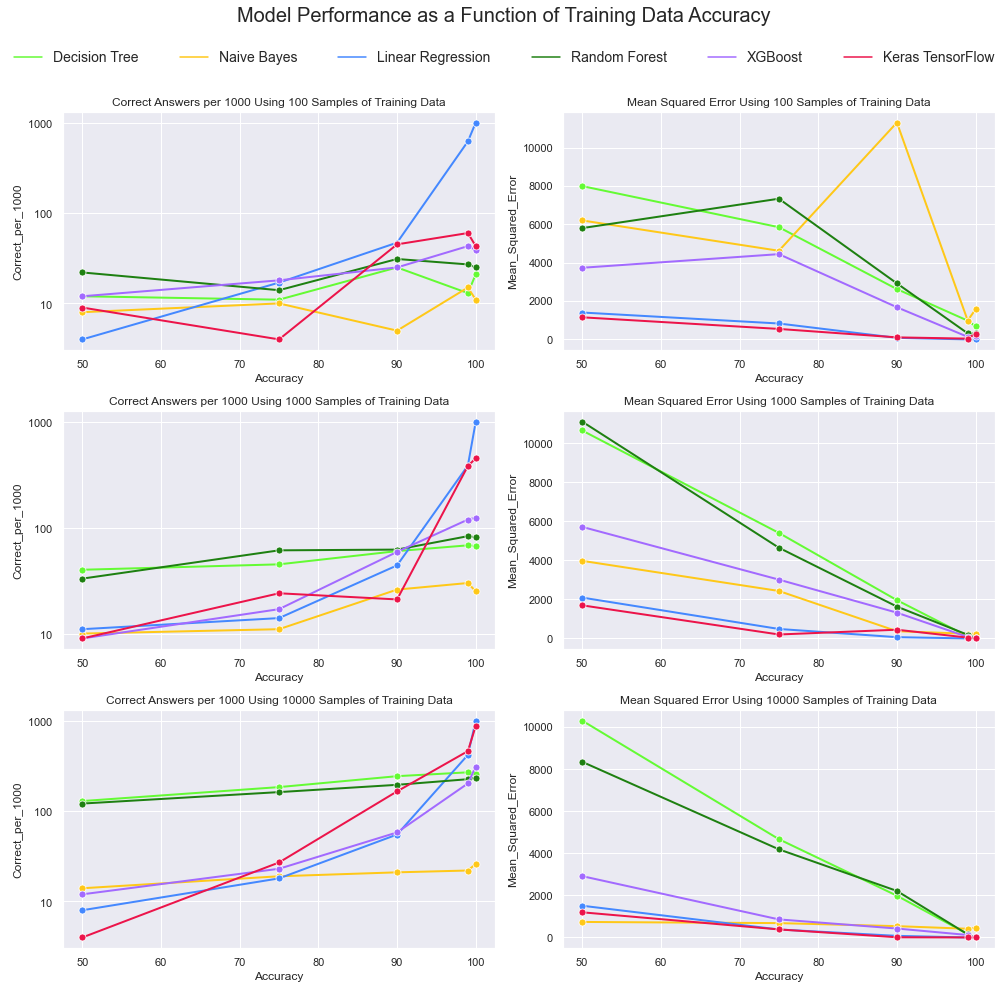

In [147]:
# Model Performance as a Function of Training Data Accuracy
# Version 2 graphing using subplots and additional formatting

custom_palette = ['#64FB34', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Accuracy\n\n\n", fontsize=20)


# CORRECT ANSWERS
title = "Correct Answers per 1000 Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()


# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=6, fontsize=14, borderpad=0.5, frameon=False)


# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_accuracy.png', facecolor='w')



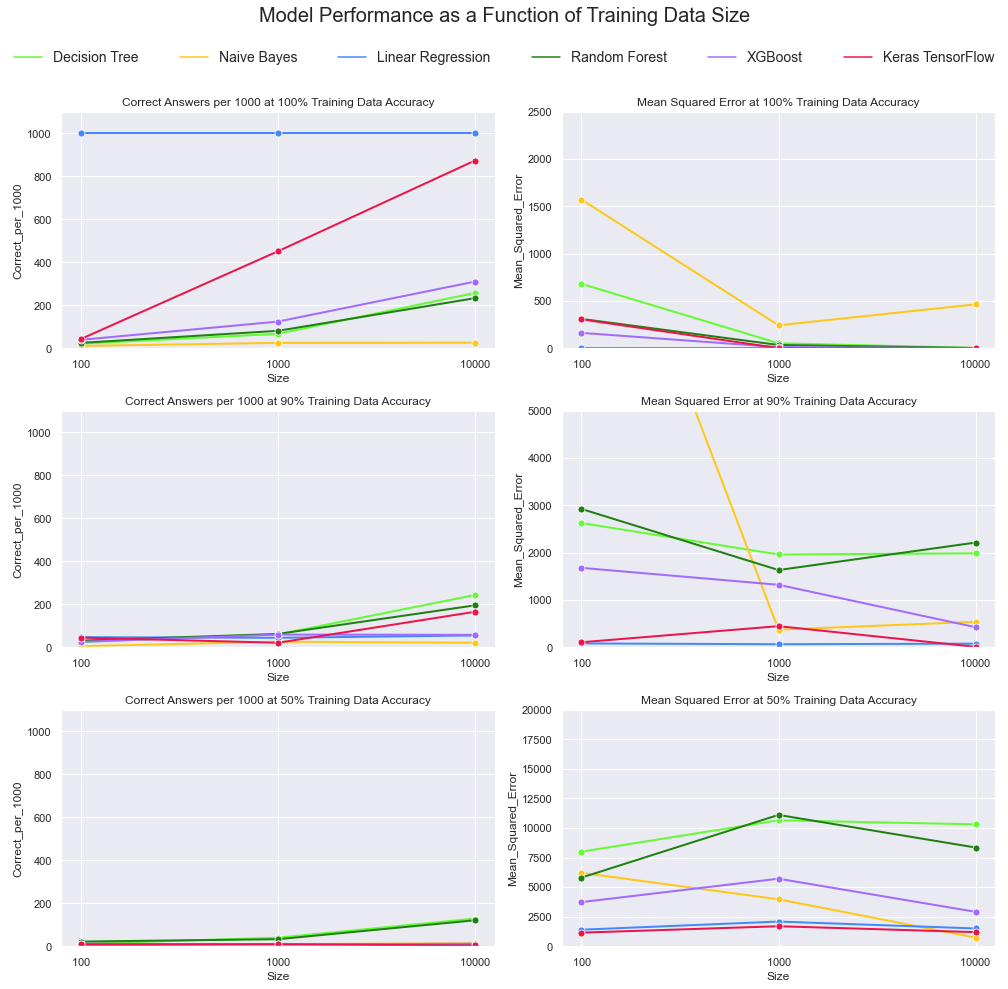

In [148]:
# Model Performance as a Function of Training Data Size
# Version 2 graphing using subplots and additional formatting

custom_palette = ['#64FB34', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Size\n\n\n", fontsize=20)


# CORRECT ANSWERS
title = "Correct Answers per 1000 at {}% Training Data Accuracy"

ylim=(0, 1100)

training_accuracy = 100
ax=axes[0,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error at {}% Training Data Accuracy"

training_accuracy = 100
ax=axes[0,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 2500))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 5000))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 20000))
plot.set(xscale='log')
ax.get_legend().remove()

# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=6, fontsize=14, borderpad=0.5, frameon=False)


# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_size.png', facecolor='w') 


# How Did I Do?
Checking predictions on individual sets of numbers.

In [59]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {get_name_of_model(model)}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [60]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]
#     print(f"I was trained using {training_sets[trainingset_n]}.")
    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)
    print()
    

In [61]:
test_how_i_did(12, 5, 7, 6)

I am Keras.TensorFlow.
I think that 7 + 6 = 10.07
How did I do?



In [62]:
def how_did_all_models_do(test_set, a_test, b_test):
    current_training_set = training_sets[test_set]

    print(current_training_set, "\n")
    
    for i in range(len(list_of_models)):
        test_how_i_did(test_set, i, a_test, b_test)


In [63]:
how_did_all_models_do(10, 3, 4)

10000 training numbers at 100% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 7.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 45.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 7.00
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 7.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 5.82
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 6.89
How did I do?



In [64]:
how_did_all_models_do(3, 3, 4)

100 training numbers at 75% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = -13.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = -48.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 0.96
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = -48.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 0.45
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 3.84
How did I do?



# Visualisation: Scatterplot of Training vs Prediction

In [65]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))


In [136]:
def scatterplot_accuracy(dataset, **kwargs):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plot = sns.scatterplot(x=correct_plot, y=predict_plot, **kwargs)
    plot.set(ylim=(-200, 200))
    

In [149]:
def grid_of_scatterplots(training_set_list, list_of_training_models, n_tests):
    
    figsize = (20, 30)
    no_sets = len(training_set_list)
    no_models = len(list_of_training_models) + 1
    
    fig, axes = plt.subplots(no_models, no_sets, figsize=figsize)
    
    fig.suptitle("Scatterplots of Predicted vs Correct Answers\n\n", fontsize=30)
    
    ax_y = 0
    
    for training_set in training_set_list:
        
        current_training_set = training_sets[training_set]
        ax_x = 0
        ax=axes[ax_x, ax_y]
        ax.set_title(current_training_set, fontsize=16)
        
        # training set plot
        training_set_to_plot = current_training_set
        
        plot = scatterplot_accuracy(training_set_to_plot, color=".5", s=20, ax=ax)
        
        ax_x +=1

        # plot all tests
        for current_model in list_of_training_models:
            ax=axes[ax_x, ax_y]
            
            current_test_model = train_model(current_model, current_training_set)
            set_to_plot = prediction_output(current_test_model, n_tests)
            plot = scatterplot_accuracy(set_to_plot, s=20, ax=ax)
            ax.set_title(get_name_of_model(current_model), fontsize=16)
            
            ax_x +=1
            
        ax_y +=1
        
    # plot in tight layout
    fig.tight_layout()


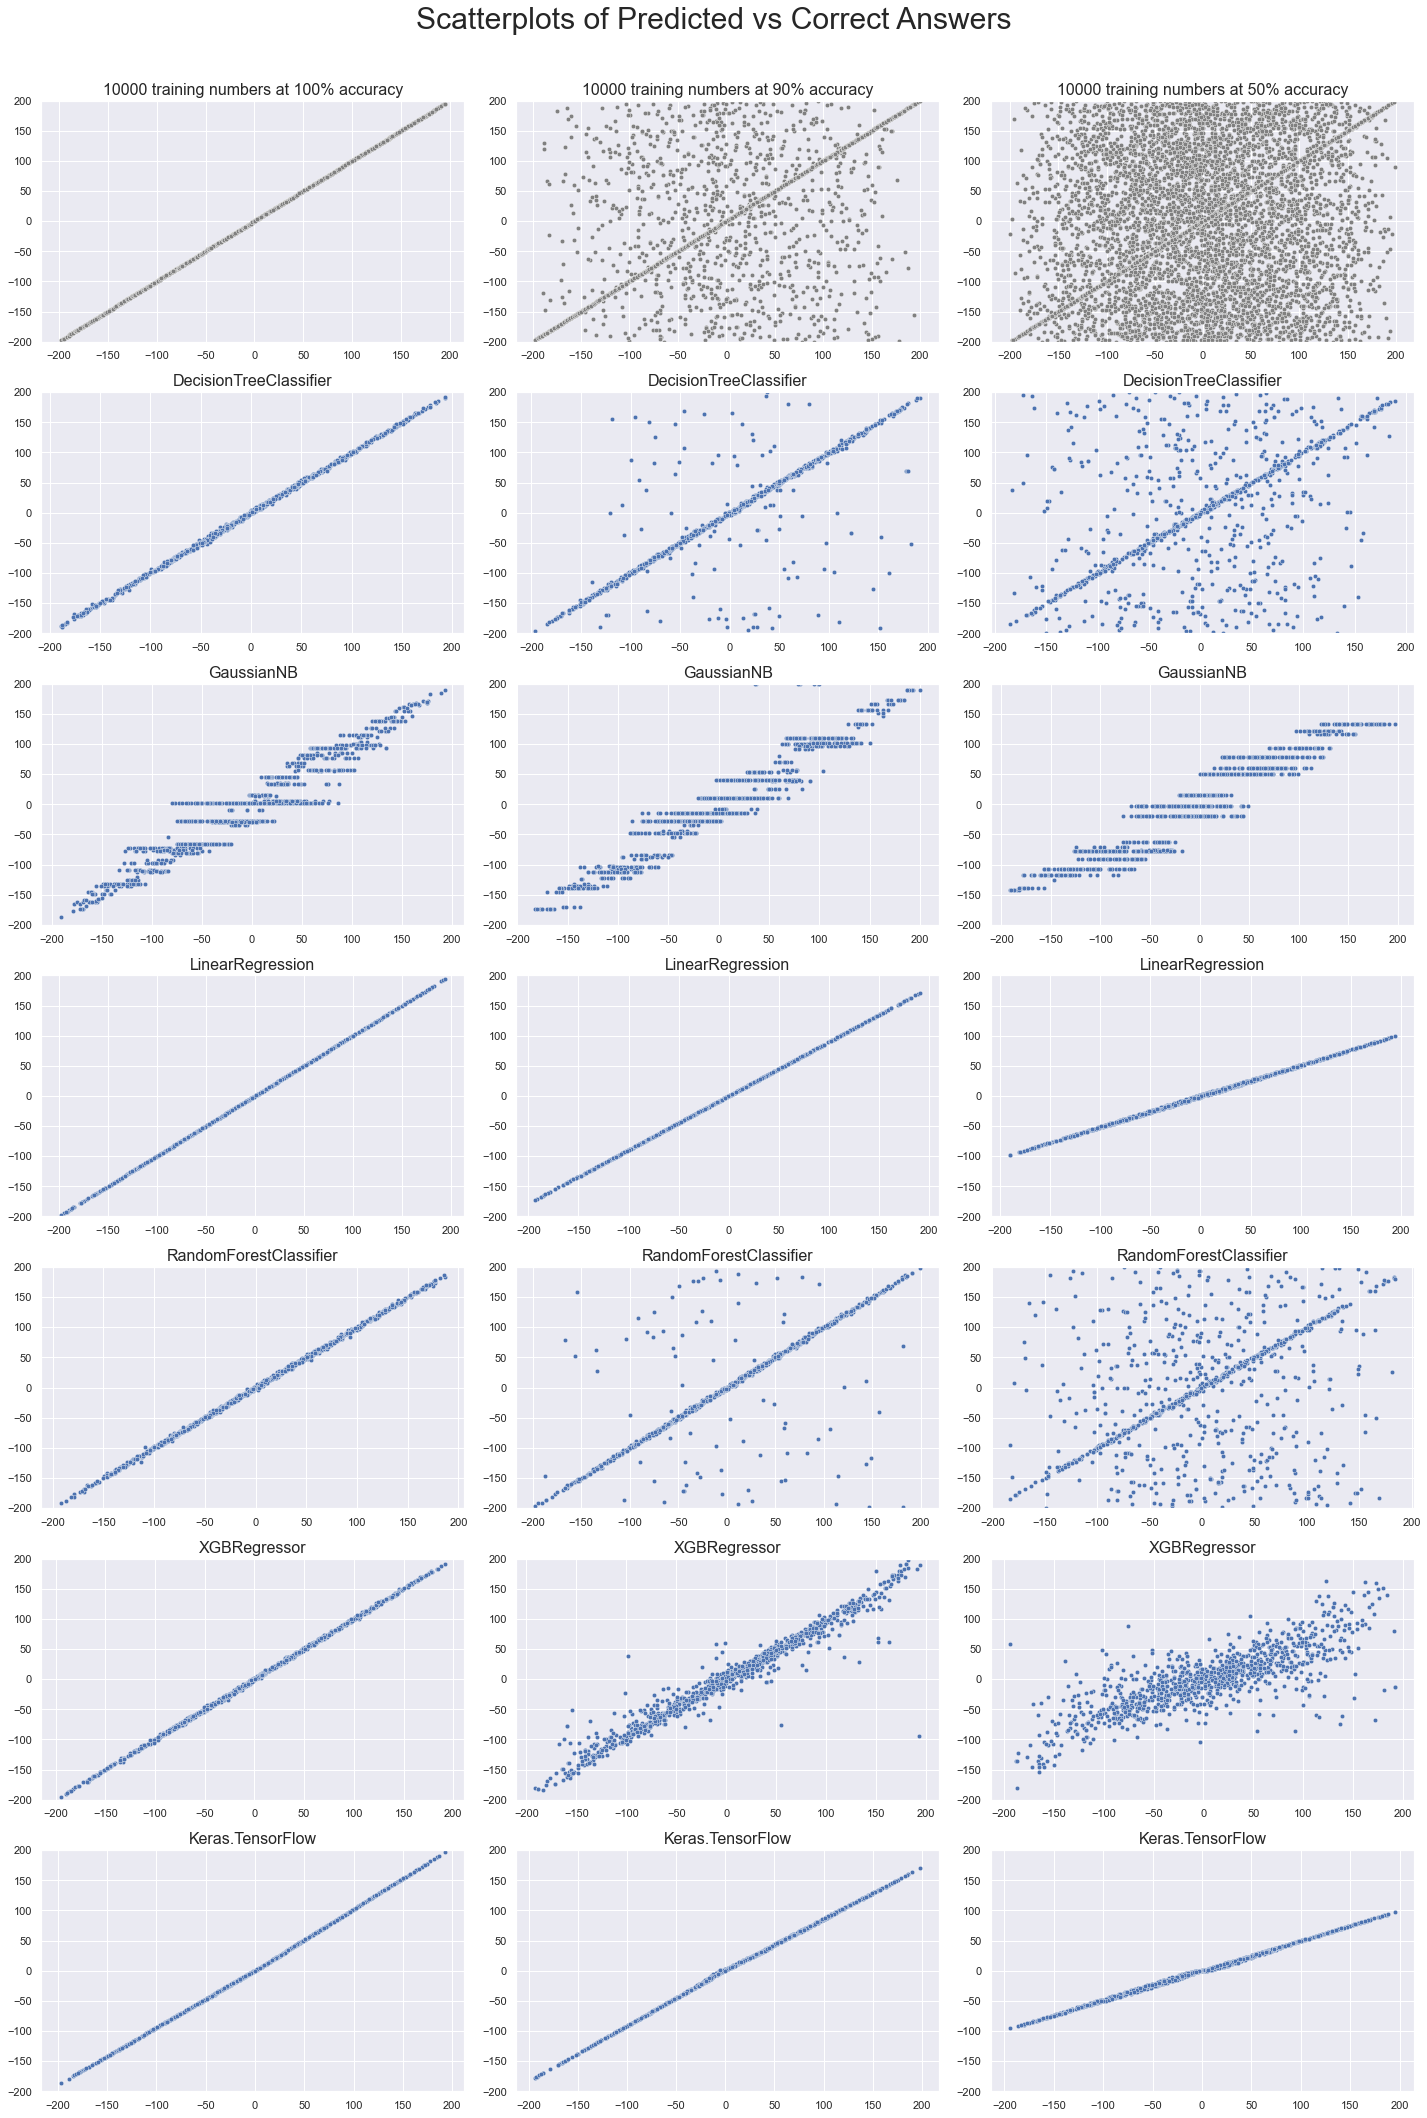

In [150]:
sets_to_plot = [10, 12, 14]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_10k_samples.png', facecolor='w') 

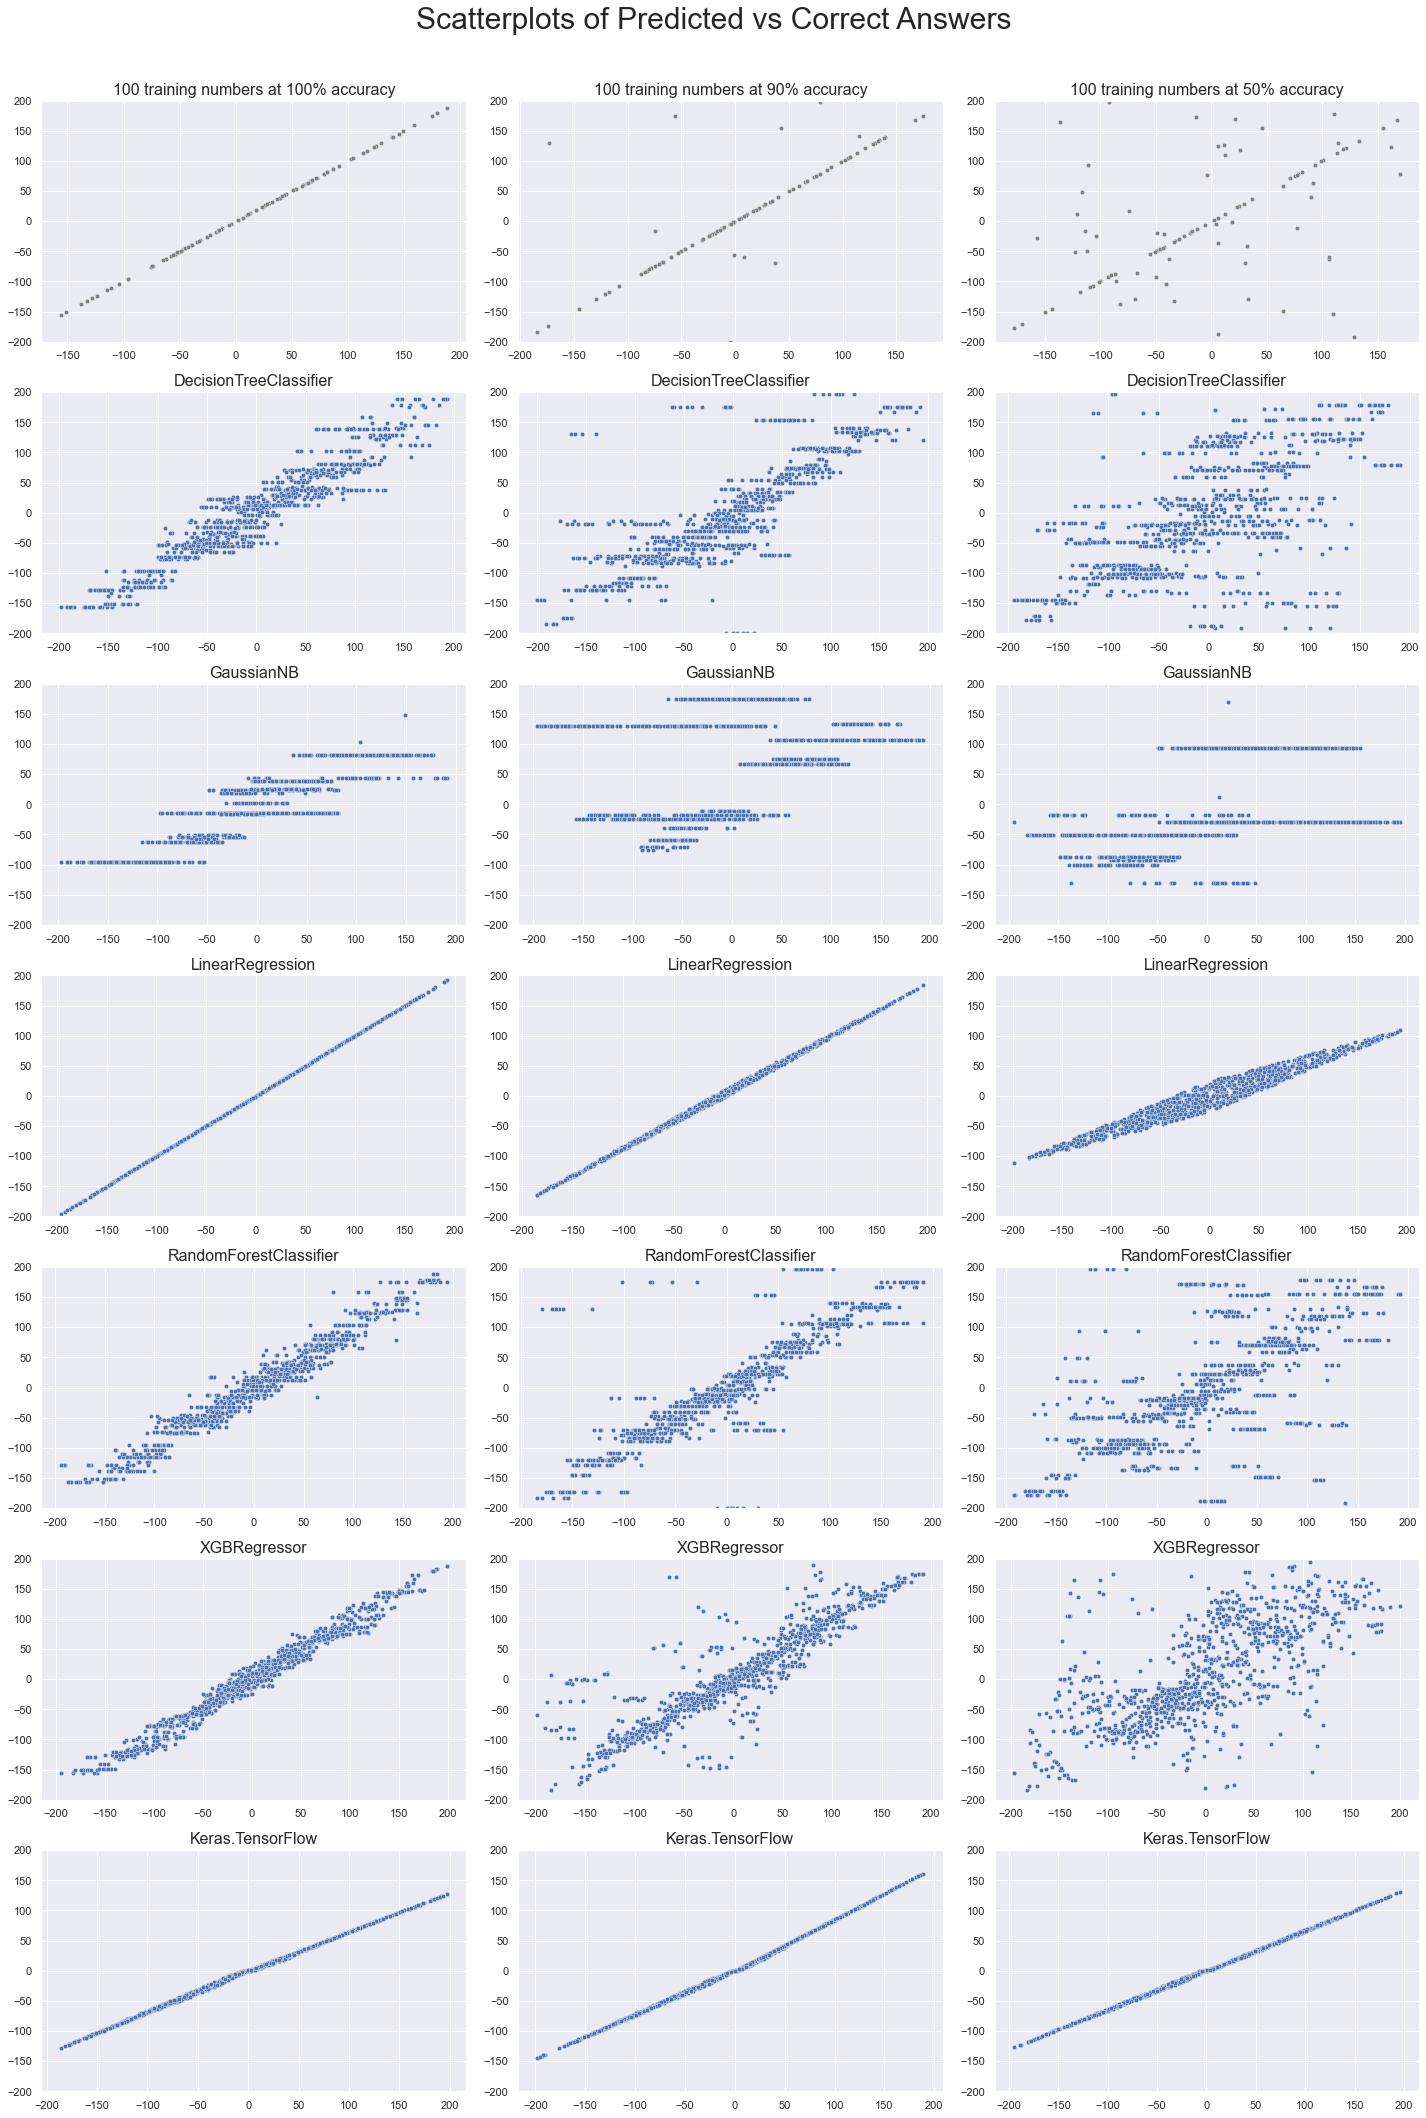

In [151]:
sets_to_plot = [0, 2, 4]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_100_samples.png', facecolor='w') 

# Predictions Grid Visualisation

In [ ]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(get_name_of_model(current_train_model))

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

In [ ]:
def heatmap_grid(prediction_grid):
    figsize=(11, 9)
    grid = pd.DataFrame(prediction_grid)
    plt.figure(figsize=figsize)
    
    plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                       vmin=0, vmax=20);  # vmin and vmax need to be updated with pridiction grid
    plt.title('Add This Value')
    plt.ylabel('To This Value')
    plot.xaxis.tick_top()


### Grids of Predictions for Each Model at 50% Training Data Accuracy

In [ ]:
heatmap_grid(prediction_grid(14, 0, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(14, 1, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(14, 2, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(14, 3, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(14, 4, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(14, 5, 0, 10))

### Grids of Predictions for Each Model at 90% Training Data Accuracy

In [ ]:
heatmap_grid(prediction_grid(12, 0, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(12, 1, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(12, 2, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(12, 3, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(12, 4, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(12, 5, 0, 10))

### Grids of Predictions for Each Model at 100% Training Data Accuracy

In [ ]:
heatmap_grid(prediction_grid(10, 0, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(10, 1, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(10, 2, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(10, 3, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(10, 4, 0, 10))

In [ ]:
heatmap_grid(prediction_grid(10, 5, 0, 10))